
## Group3 BI 4

## 1- Data and Packages Import

#### 1.1-Packages import

In [ ]:
# vector manipulation
import numpy as np
# for data analysis
import pandas as pd
# For dataviz
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [ ]:
#Import stats Library for statistic test
from scipy.stats import chi2_contingency, f_oneway
!pip install colorama
from colorama import Fore
import scipy.stats as stats
import statsmodels.api as sma

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# machine learning
from sklearn.linear_model import LinearRegression,Ridge,RidgeClassifier,LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.neighbors import  KNeighborsClassifier
import re
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

# for comparison
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error,confusion_matrix,classification_report

In [ ]:
# Some functions used before and after the model
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, \
    classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import silhouette_score

In [ ]:
# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot

##Churn Telco BI Project

##Context

The leading telecom company has a massive market share but one big problem: several rivals that are constantly trying to steal customers. Because this company has been the market leader for so many years, there are not significant opportunities to grow with new customers.Instead, company executives have decided to focuson their churn: the rate at which they lose customers.

They have two teams especially interested in this data: 

The marketing team and the customer service team. Each team has its own reason for wanting the analysis. 
The marketing team wants to find out who the most likely people to churn are and create content that suits their interests. The customer service team would like to proactively reach out to customers who are about to churn, and try to encourage them to stay.

They decide to hire you for two tasks:

1.Help them identify the types of customers who churn.

2.Predict who of their current customers will churn next month.

To do this, they offer you a file of7,000 customers.Each row is a customer. The Churn column will say Yes if the customer churned in the past month.The data also offers demographic data and data on the services that each customer purchases. Finally there is information on the payments those customers make.

##Deliverables part I
What is expected?

A presentation explaining churn for the marketing team. 
Tell a story to the marketing team to help them understand the customers who churn and what the marketing team can do to prevent it.

Highlight the information with helpful visualizations.

1.How much is churn affecting the business? How big is churn compared to the existingcustomer base?

2.Explain churn by the below categories. Are there any factors that combine to be especially impactful?

a.Customer demographics like age and gender
b.Services used
c.Billing information

3.What services are typically purchased by customers who churned? Are any services especially helpful in retaining customers?

4.How long will it take for the company to lose all its customers? Which demographics will they lose first?

##Deliverables part II

Create analyses that answer the following questions:

1.Are there types of people who churn at higher rates?

Come up with 2-3 profiles to give executives an idea of who churns often. 
Try to look several factors deep for example:
people with no internet service and no phone service,or women who are senior citizens
 See FAQ for details.

2.Do you have any recommendations on how to reach groups of people who churn at high rates?

3.Create a case study for one of your customer profiles.
Show how much additional revenue you could make by increasing sales by 10% in that profile.

4.Use a clustering algorithm like K-Means to break customers into groups.

a.How many groups did you build and how did you decide on that number of groups?

b.How does churn vary by group?

c.How is this similar or different to your analysis without using Machine Learning?


FAQ1.What is a customer profile? It’s a device used to tell a story about customers by providing an example of what a typical customer is. 
A commonly used visualization for a customer profile is a radar chart, but feel free to create your own.


#Connect to data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 1.2- Data Import

In [ ]:
# Load the data provided by Telco
df = pd.read_csv('/content/drive/MyDrive/Churn BI Analysis/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
# Open and explore the data provided by Telco
display(df)
df.info()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#convert TotalCharges type object in float
df["TotalCharges"] = pd.to_numeric(df.TotalCharges, errors="coerce") 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
print(df.dtypes)
print(df.describe())

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.

#### 2- Analysis Information

**Analysis:**

-There are 21 differents columns.

-There are approximately 7043 customers records.

-There are 30 days observed date based on churn columns description.

-The monthly mean charge are about 64$.

-The maximum monthly charge is about 118$.

-The mean of total charge is about 2283$.

-The min and the max of total charge are respectively 18 $ and 8684 $.


#Questions

-What is the exact number of customers who churned last month? percentage ?

-How is the financial values of churned customer? percentage of total values.

####-What is the exact number of customers who churned last month? percentage ?

In [ ]:
#calculate the number of churn customer and the percentage
num_of_yes_churn= df.Churn[df.Churn == 'Yes'].count()
print("Total number of churn customer: ",num_of_yes_churn , "customers")
percentage_churn_yes = round((num_of_yes_churn/df.shape[0])*100,2)
print("Percentage of churn customer: ",'{:,}'.format(percentage_churn_yes), "%") 

Total number of churn customer:  1869 customers
Percentage of churn customer:  26.54 %


#### -How is the financial values of churned customer? percentage of total values.

In [ ]:
# calculate the financial value of churn customer and the percentage
financial_values_of_churn_customer=df[df["Churn"]== "Yes"]["TotalCharges"].sum()
print("The value of financial churn customer: $",'{:,}'.format(financial_values_of_churn_customer))
financial_value_percent_of_churn_customer =round((financial_values_of_churn_customer/df["TotalCharges"].sum())*100,2)
print("Percentage financial values of churned customers: ",'{:,}'.format(financial_value_percent_of_churn_customer), "%")

The value of financial churn customer: $ 2,862,926.9
Percentage financial values of churned customers:  17.83 %


-How many customers Telco loses per day?

In [ ]:
# number of customers lost per day
Telco_customer_losses_per_day=round(num_of_yes_churn/30,1)
Telco_customer_losses_per_day
print("Every day Telco loses: ",'{:,}'.format(Telco_customer_losses_per_day), "customers") 

Every day Telco loses:  62.3 customers


Analysis:

-There are 26,54% of customers who churn their contract.

The financial amount losses due by to theirs resignation is more than 2.8 millions dollars by month. 

The losses rate it is higher that Telcom losts 62 customers per day. 

###Find unique values

#### 2.1- Values Formating

In [ ]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

### Drop NaaN rows 

In [ ]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
null_values = df[df['TotalCharges'].isnull()].index.to_list()
df.loc[df.index.isin(null_values), 
       'TotalCharges'] = df.loc[df.index.isin(null_values), 'MonthlyCharges']

In [ ]:
df[df.index.isin(null_values)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,52.55,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,20.25,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,80.85,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,25.75,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,56.05,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,19.85,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,25.35,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,20.00,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,19.70,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,73.35,No


In [ ]:
#Show drop null row effect
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#Describe numerical values
df.describe(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,6986-IJDHX,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [ ]:

#create categorical list
liste_cat =['gender','SeniorCitizen','Partner','Dependents','PhoneService',
            'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
            'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
            'PaperlessBilling','PaymentMethod']

In [ ]:
#transform the type of the list to category
liste_cat1 = df[liste_cat].astype('category')

In [ ]:
#Transform dataframe by dummies
liste_cat_dum = pd.get_dummies(liste_cat1)

In [ ]:
liste_cat_dum.head()

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
2,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0
4,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [ ]:
print(liste_cat_dum.shape)
print(liste_cat_dum.columns)

(7043, 40)
Index(['gender_Female', 'gender_Male', 'SeniorCitizen_0', 'SeniorCitizen_1',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',

## Final Data

In [ ]:
#create numerical dataframe
numerical_data = df.loc[:,['tenure','MonthlyCharges','TotalCharges']]
numerical_data.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [ ]:
#create variable target
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)
target = df['Churn']
target.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [ ]:
#concatener cat_data & num_data and specified target columns
x = pd.concat([liste_cat_dum,numerical_data], axis=1)
y= target
print(x)
print(y)

      gender_Female  gender_Male  ...  MonthlyCharges  TotalCharges
0                 1            0  ...           29.85         29.85
1                 0            1  ...           56.95       1889.50
2                 0            1  ...           53.85        108.15
3                 0            1  ...           42.30       1840.75
4                 1            0  ...           70.70        151.65
...             ...          ...  ...             ...           ...
7038              0            1  ...           84.80       1990.50
7039              1            0  ...          103.20       7362.90
7040              1            0  ...           29.60        346.45
7041              0            1  ...           74.40        306.60
7042              0            1  ...          105.65       6844.50

[7043 rows x 43 columns]
0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64


#### 2.2- Dummies generated

In [ ]:
df_dummies=pd.concat([x,y],axis=1)
df_dummies

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,29.85,29.85,0
1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,34,56.95,1889.50,0
2,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,2,53.85,108.15,1
3,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,45,42.30,1840.75,0
4,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,24,84.80,1990.50,0
7039,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,72,103.20,7362.90,0
7040,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,11,29.60,346.45,0
7041,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,4,74.40,306.60,1


In [ ]:
#Count non senior citizen
df_dummies[df_dummies['SeniorCitizen_0']== 1].count()

gender_Female                              5901
gender_Male                                5901
SeniorCitizen_0                            5901
SeniorCitizen_1                            5901
Partner_No                                 5901
Partner_Yes                                5901
Dependents_No                              5901
Dependents_Yes                             5901
PhoneService_No                            5901
PhoneService_Yes                           5901
MultipleLines_No                           5901
MultipleLines_No phone service             5901
MultipleLines_Yes                          5901
InternetService_DSL                        5901
InternetService_Fiber optic                5901
InternetService_No                         5901
OnlineSecurity_No                          5901
OnlineSecurity_No internet service         5901
OnlineSecurity_Yes                         5901
OnlineBackup_No                            5901
OnlineBackup_No internet service        

###Hypothesis Test
The contingency tables between Fraud and other Categorical variables

+

Chi-Square test (A Chi-Square test is determined by a significant difference or relationship between two categorical variables from a single population. In general, this test assesses whether distributions of categorical variables differ from each other).

The contingency table between Churn and Gender

+ Chi-Square test


Null Hypothesis H0: The two categorical variables are independent—that is, Churn is independent with gender.

Alternative Hypothesis Ha : The two categorical variables are not independent—that is, churn is not independent with gender.

In [ ]:
#create index 
df["index"]=df.index

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,index
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,2
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,4


In [ ]:
# Summarise dataframe using pivot table: Churn & Gender
churn_and_gender_pivot=pd.pivot_table(df,values="index", index=['Churn'],columns=['gender'], aggfunc="count",fill_value =0)

In [ ]:
churn_and_gender_pivot

gender,Female,Male
Churn,,
0,2549,2625
1,939,930


In [ ]:
# Apply Test
stat, p, dof, expected = chi2_contingency(churn_and_gender_pivot.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 0.48657873605618596
Hypothesis Accepted


In [ ]:
# Summarise dataframe using pivot table: Churn & SeniorCitizen
churn_and_SeniorCitizen_pivot=pd.pivot_table(df,values="index", index=['Churn'],columns=['SeniorCitizen'], aggfunc="count",fill_value =0)

In [ ]:
# Apply Test
stat, p, dof, expected = chi2_contingency(churn_and_SeniorCitizen_pivot.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 1.510066805092378e-36
Hypothesis Rejected


In [ ]:
# Summarise dataframe using pivot table: Churn & Dependents
churn_and_Dependents_pivot=pd.pivot_table(df,values="index", index=['Churn'],columns=['Dependents'], aggfunc="count",fill_value =0)

In [ ]:
# Apply Test
stat, p, dof, expected = chi2_contingency(churn_and_Dependents_pivot.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 4.9249216612154196e-43
Hypothesis Rejected


In [ ]:
# Summarise dataframe using pivot table: Churn & Contract
churn_and_Contract_pivot=pd.pivot_table(df,values="index", index=['Churn'],columns=['Contract'], aggfunc="count",fill_value =0)

In [ ]:
# Apply Test
stat, p, dof, expected = chi2_contingency(churn_and_Contract_pivot.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 5.863038300673391e-258
Hypothesis Rejected


In [ ]:
# Summarise dataframe using pivot table: Churn & PaymentMethod
churn_and_PaymentMethod_pivot=pd.pivot_table(df,values="index", index=['Churn'],columns=['PaymentMethod'], aggfunc="count",fill_value =0)

In [ ]:
# Apply Test
stat, p, dof, expected = chi2_contingency(churn_and_PaymentMethod_pivot.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 3.6823546520097993e-140
Hypothesis Rejected


In [ ]:
# Summarise dataframe using pivot table: Churn & PaperlessBilling
churn_and_PaperlessBilling_pivot=pd.pivot_table(df,values="index", index=['Churn'],columns=['PaperlessBilling'], aggfunc="count",fill_value =0)

In [ ]:
# Apply Test
stat, p, dof, expected = chi2_contingency(churn_and_PaperlessBilling_pivot.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 4.073354668665985e-58
Hypothesis Rejected


###Anova Test
Null Hypothesis H0: There is no difference between the mean performance
score of multiple locations.

Alternative Hypothesis Ha: There is a difference between the mean
performance score of multiple locations.

In [ ]:
stat, p = f_oneway(df.Churn, df.MonthlyCharges, df.TotalCharges)
print("p-values:", p)
print("ANOVA:", stat)
if p < 0.05:
  print("Hypothesis Rejected")
else:
  print("Hypothesis Accepted")

p-values: 0.0
ANOVA: 6925.740047439526
Hypothesis Rejected


###Deliverables part I

###Questions

1.How much is churn affecting the business? How big is churn compared to the existing customer base?

2.Explain churn by the below categories. Are there any factors that combine to be especially impactful?

a.Customer demographics like age and gender

b.Services used 

c.Billing information


3.What services are typically purchased by customers who churned? Are any services especially helpful in retaining customers?

4.How long will it take for the company to lose all its customers? Which demographics will they lose first?

###The distribution and graphics of categorical columns are as follows:

In [ ]:
df.customerID.value_counts().to_frame()

,customerID
6986-IJDHX,1
0361-HJRDX,1
2832-KJCRD,1
7503-EPSZW,1
6629-CZTTH,1
...,...
8150-QUDFX,1
7916-VCCPB,1
1400-WIVLL,1
6857-TKDJV,1


## 4- Final Visualization and Exploratory

In [ ]:
#create function able to plot and calculate descriptive analysis for categorical columns 
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}), 
          end='\n\n\n')

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title(col_name)
        plt.xticks(rotation = 45)
        plt.show()


## 4.1 let's see the analysis for each categorical columns

In [ ]:
cat_cols=['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

        gender     Ratio
Male      3555  50.47565
Female    3488  49.52435




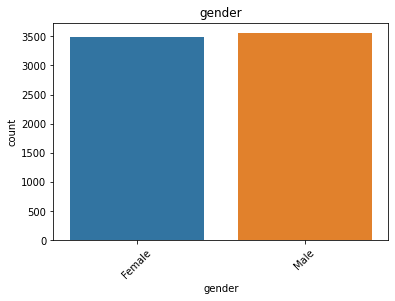

   SeniorCitizen      Ratio
0           5901  83.785319
1           1142  16.214681




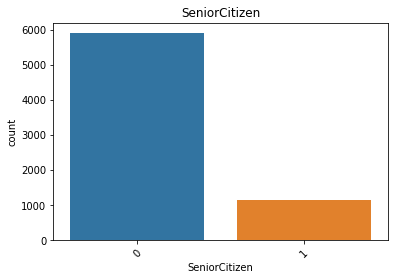

     Partner     Ratio
No      3641  51.69672
Yes     3402  48.30328




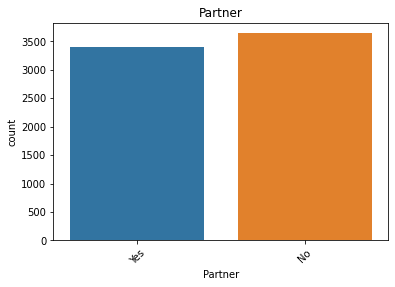

     Dependents      Ratio
No         4933  70.041176
Yes        2110  29.958824




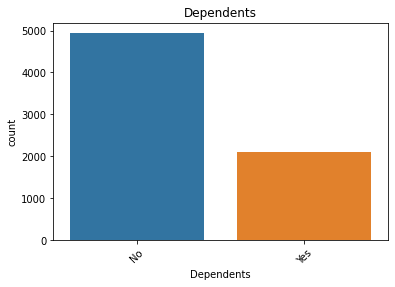

     PhoneService      Ratio
Yes          6361  90.316626
No            682   9.683374




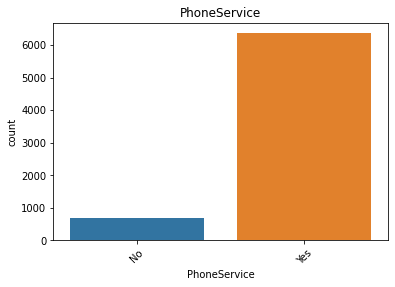

                  MultipleLines      Ratio
No                         3390  48.132898
Yes                        2971  42.183729
No phone service            682   9.683374




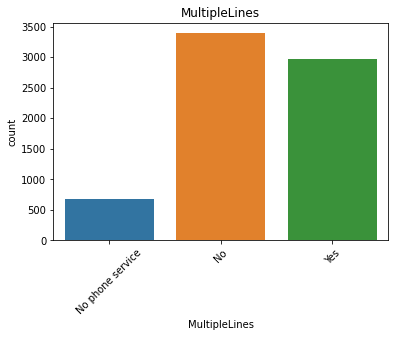

             InternetService      Ratio
Fiber optic             3096  43.958540
DSL                     2421  34.374556
No                      1526  21.666903




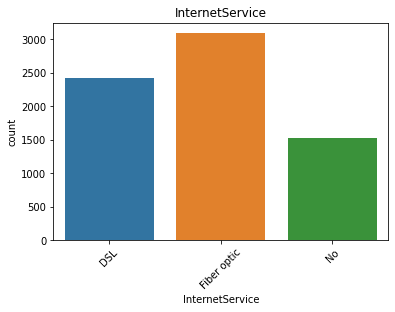

                     OnlineSecurity      Ratio
No                             3498  49.666335
Yes                            2019  28.666761
No internet service            1526  21.666903




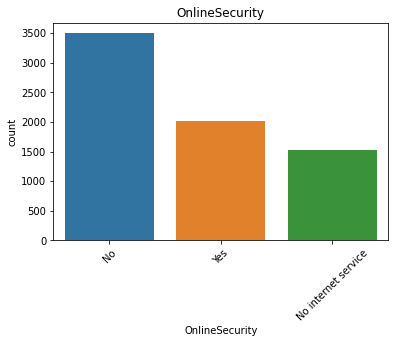

                     OnlineBackup      Ratio
No                           3088  43.844952
Yes                          2429  34.488144
No internet service          1526  21.666903




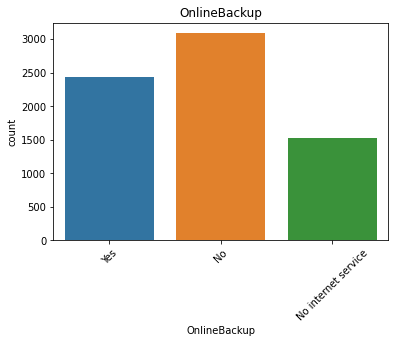

                     DeviceProtection      Ratio
No                               3095  43.944342
Yes                              2422  34.388755
No internet service              1526  21.666903




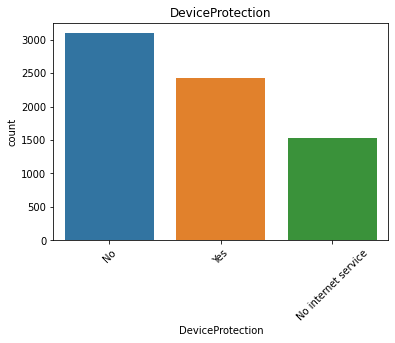

                     TechSupport      Ratio
No                          3473  49.311373
Yes                         2044  29.021724
No internet service         1526  21.666903




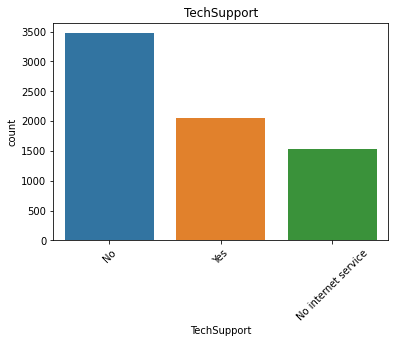

                     StreamingTV      Ratio
No                          2810  39.897771
Yes                         2707  38.435326
No internet service         1526  21.666903




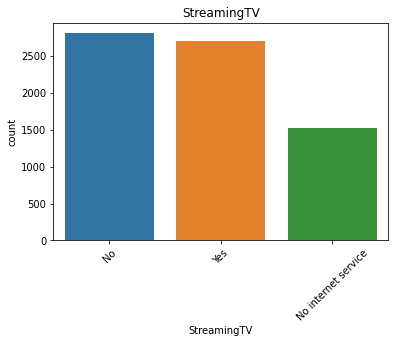

                     StreamingMovies      Ratio
No                              2785  39.542808
Yes                             2732  38.790288
No internet service             1526  21.666903




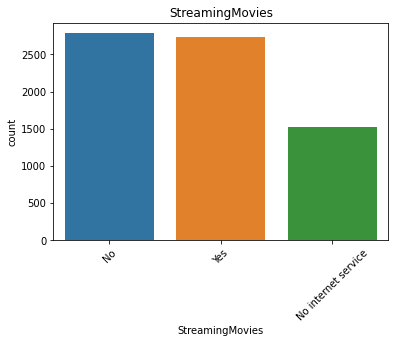

                Contract      Ratio
Month-to-month      3875  55.019168
Two year            1695  24.066449
One year            1473  20.914383




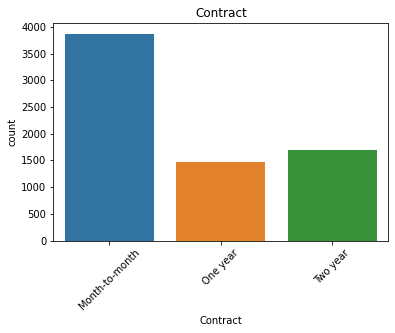

     PaperlessBilling      Ratio
Yes              4171  59.221922
No               2872  40.778078




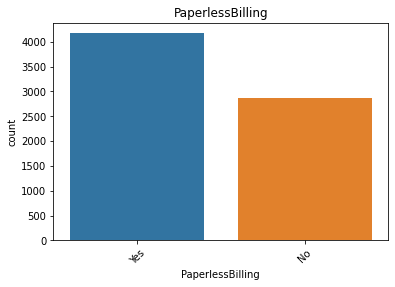

                           PaymentMethod      Ratio
Electronic check                    2365  33.579441
Mailed check                        1612  22.887974
Bank transfer (automatic)           1544  21.922476
Credit card (automatic)             1522  21.610109




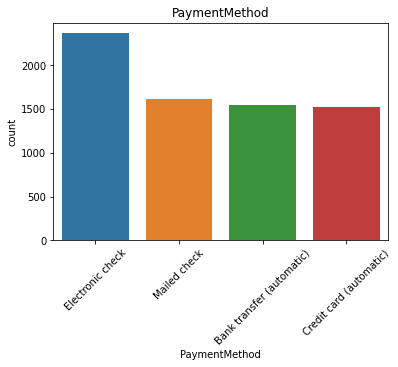

   Churn      Ratio
0   5174  73.463013
1   1869  26.536987




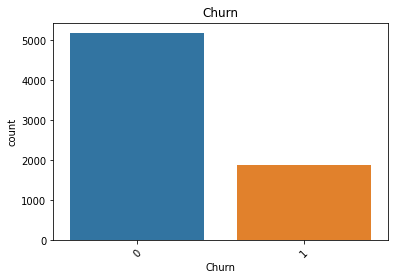

In [ ]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

## 5-Statistical description about customers,services and accountant information.

###Analysis:

We observe in the dataset we can see:

-half male and half female.

-only 16,87% of customers are citizen.

-51% of customers don't have partner.

-70% of customers is not dependents.

-90% of customers have phone services.

-42% of customers have more than one phone.

-21% of customers don't have internet services.

-49% of customers don't have online security services.

-43% of them don't have OnlineBackup.

-43% don't have DeviceProtection.

-49% don't have Tech Support.

-55% of customer have a month-to-month contract.

-33% of them use electronic check.


## Questions

#1.How much is churn affecting the business?

As we have calculated the amount of customers who cancelled their contracts and their percentage values before: we can say that: 1869 customers or 26.54% of Telcom's customer base cancelled their contracts the previous month.


### How big is churn compared to the existing customer base?


We have calculated above that customer losses cost Telco approximately $2,862,926.9 or 17.83% of their total revenue.


In [ ]:
#total revenue
total_revenue=df["TotalCharges"].sum()
print('total_revenue',"$", total_revenue)
print('financial_values_of_churn_customer',"$", financial_values_of_churn_customer)

total_revenue $ 16056624.3
financial_values_of_churn_customer $ 2862926.9


In [ ]:
financial_report = [['total_revenue', total_revenue], ['financial_values_of_churn_customer', financial_values_of_churn_customer]]
df1 = pd.DataFrame(financial_report, columns = ['index', 'financial_values'])
df1

,index,financial_values
0,total_revenue,16056624.3
1,financial_values_of_churn_customer,2862926.9


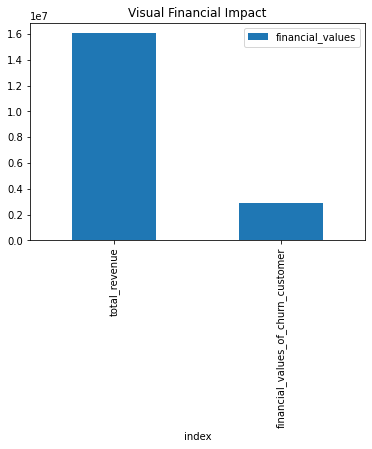

In [ ]:
# a simple line plot
df1.plot(kind='bar',title="Visual Financial Impact",x='index',y='financial_values')

#2.Explain churn by the below categories. Are there any factors that combine to be especially impactful?

###a.Customer demographics like age and gender

###b.Services used

###c.Billing information

### Correlation features goal (Churn)

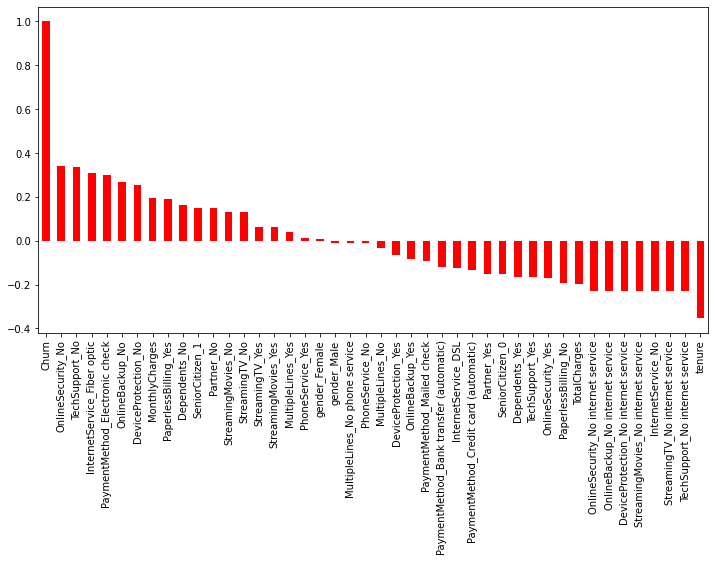

In [ ]:
#Data correlation between target variable and features.
plt.figure(figsize=(12,6))
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', cmap="autumn")

###Analysis:

We can see that none of the columns can explain more than 40% of the reason for this level of contract resignation.


The categories most likely to cancel contracts are those with the following characteristics:
- No online security service.
-No technical support.
-They have fiber optics.
-They pay by electronic check.
-They don't have online data backup service.
-They are often senior citizens.



We also find that gender is indifferent to the decision to break a contract. 



We can also see that the groups least likely to break a contract have the following characteristics:

-They are the oldest subscribers.

-They have technical support.

-They have a data protection department.

-They have a partner.

-They pay by credit card and/or automatic bank transfer.





###Explanation.

We can assume that customers who terminate their contracts do so out of dissatisfaction.

-Dissatisfaction with their fiber optic services.

-Difficulty/loss or theft in their electronic payments.

-Too high a payment burden.

We can also consider that those who stay are those who are more satisfied with their services.

In order to be sure, a satisfaction survey should be conducted.


Text(0.5, 1.0, 'Correlation HeatMap')

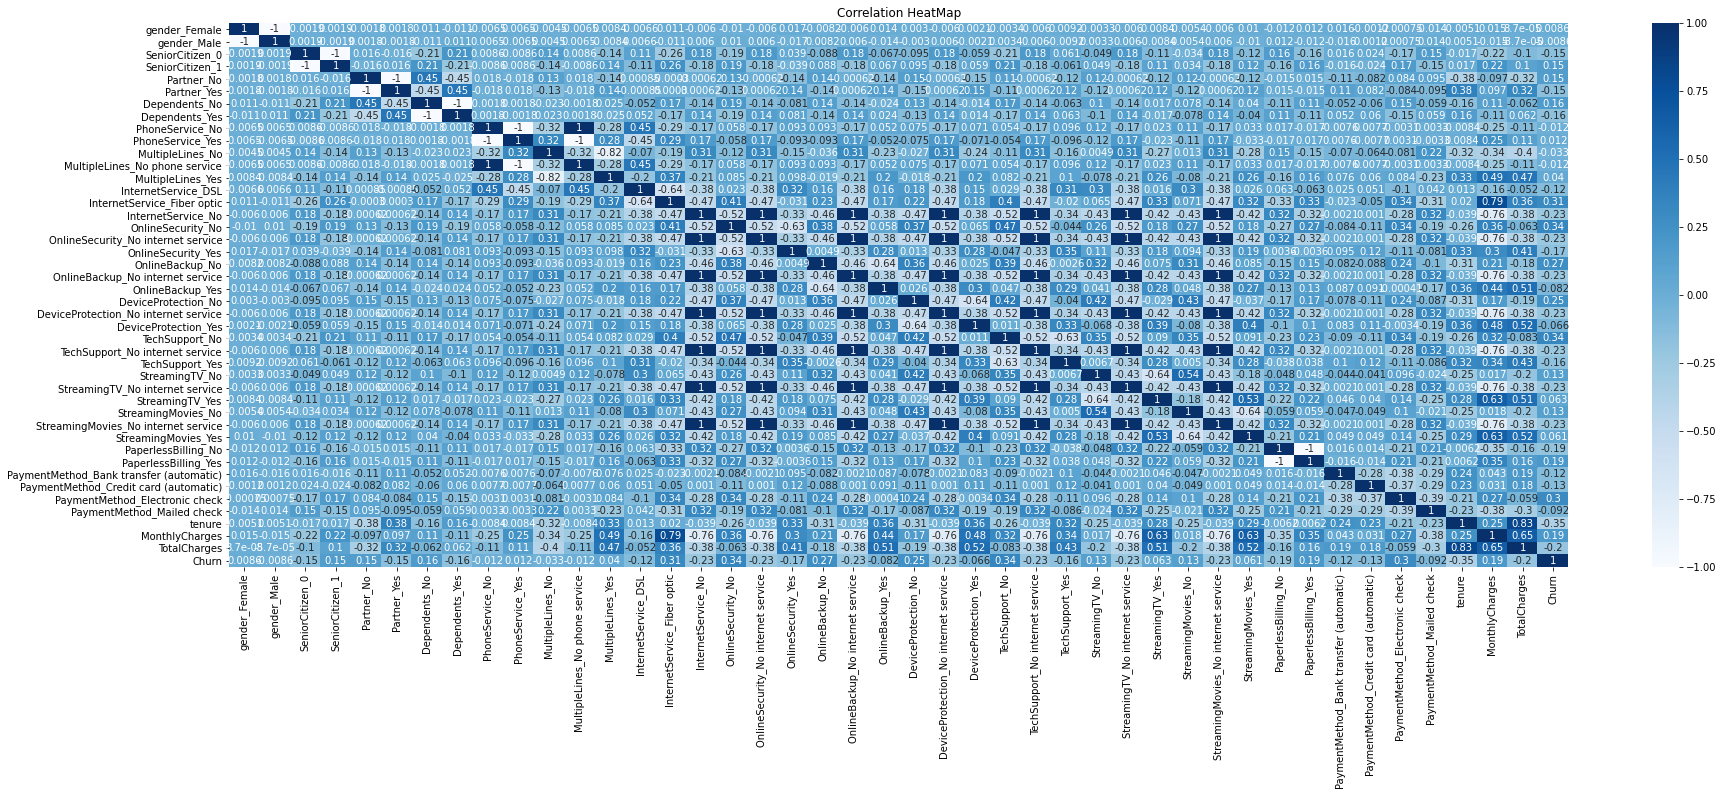

In [ ]:
plt.figure(figsize=(30,10))
sns.heatmap(df_dummies.corr(), annot=True, cmap='Blues')
plt.title('Correlation HeatMap')

#3.What services are typically purchased by customers who churned? Are any services especially helpful in retaining customers?

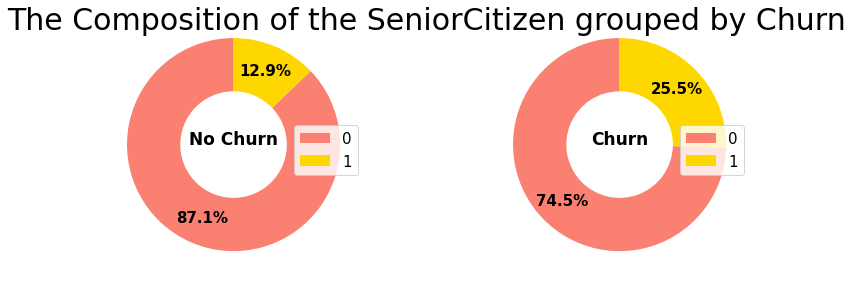

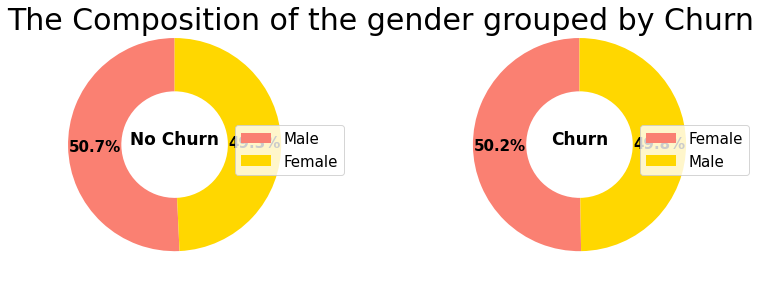

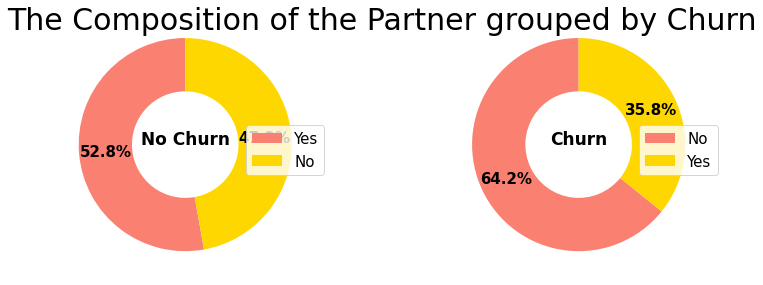

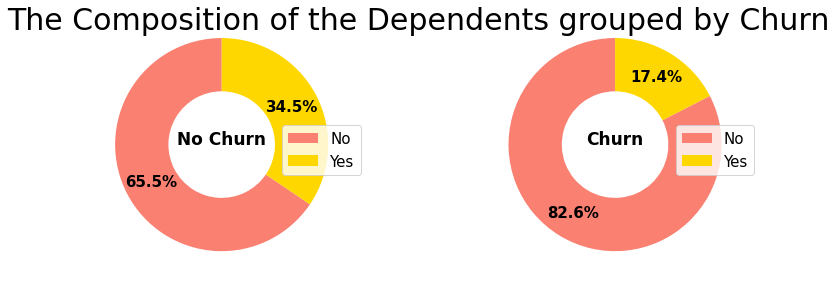

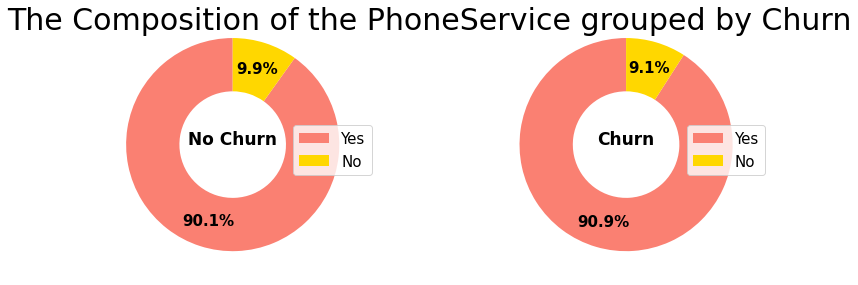

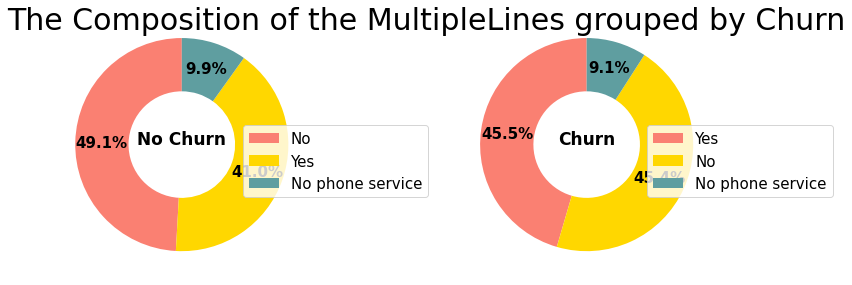

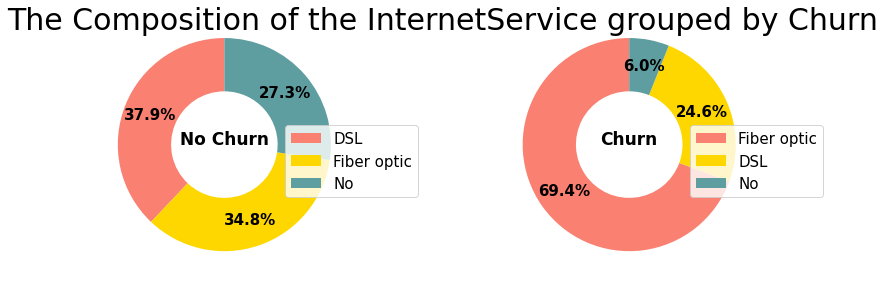

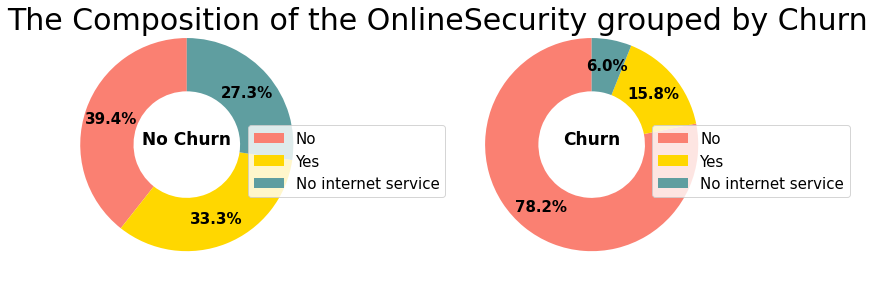

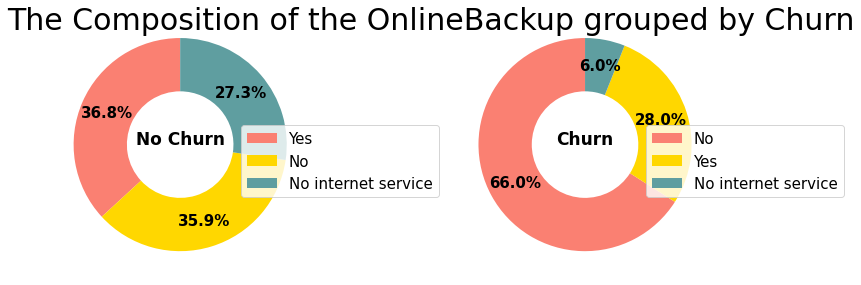

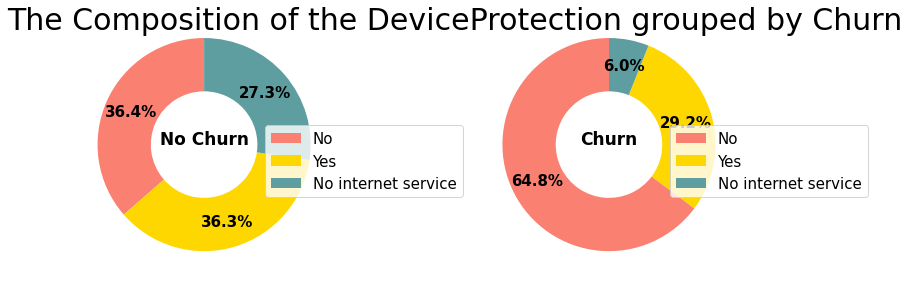

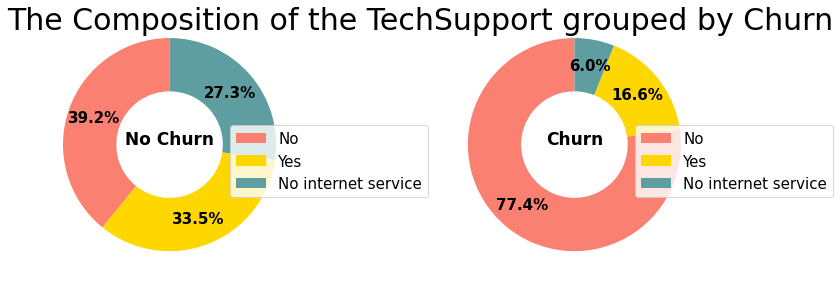

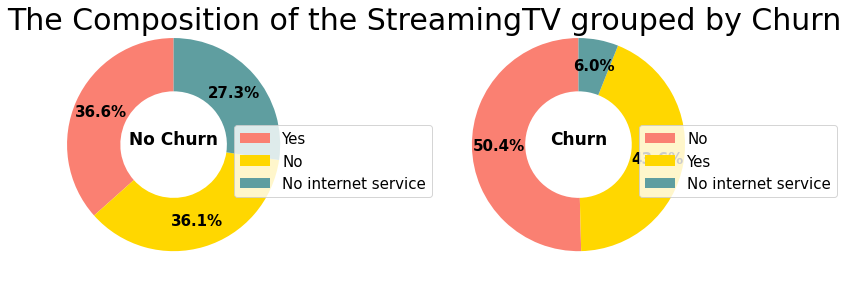

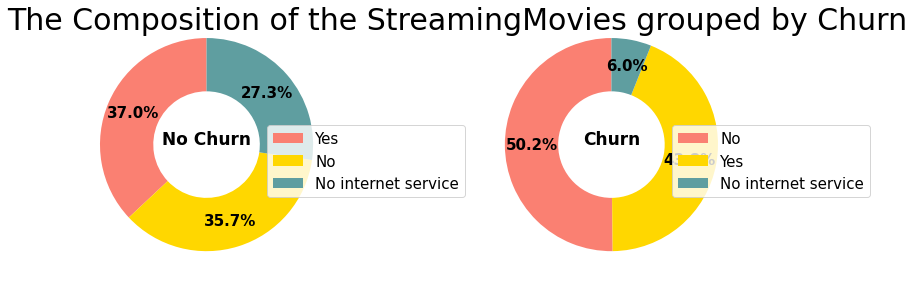

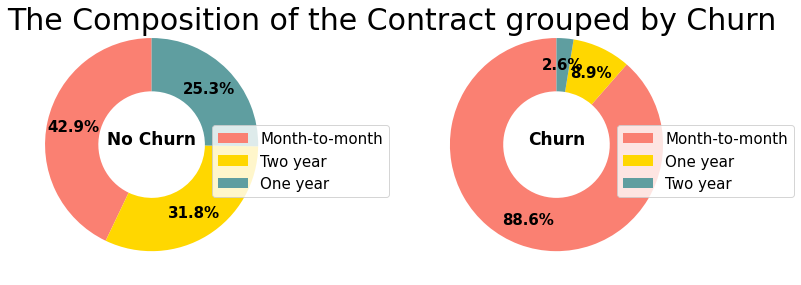

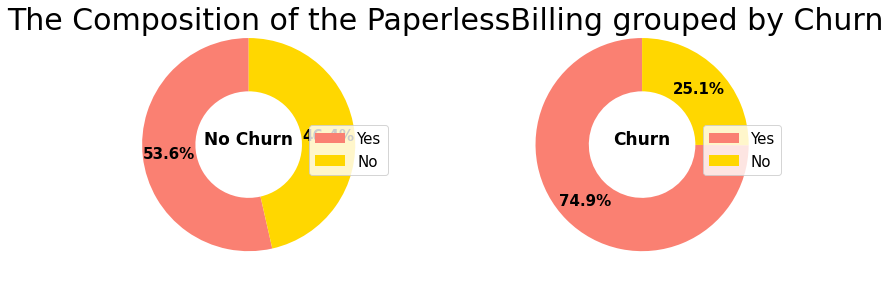

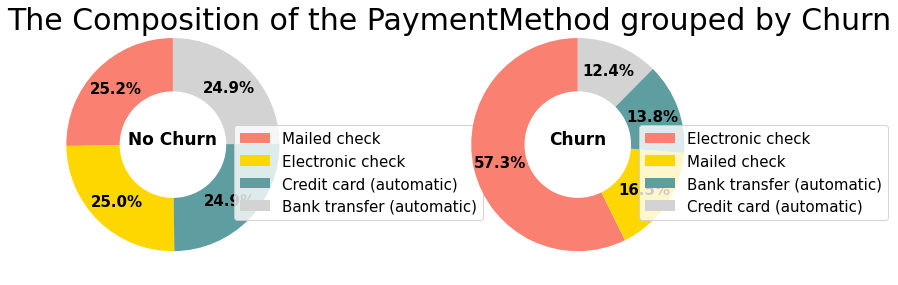

In [ ]:
#Distribution of categorical features by Churn
def Chart(col_name):
    def df1(col_name, churn_YoN):
        df1 = df[df["Churn"]==churn_YoN][col_name].value_counts().to_frame().reset_index()
        return df1

    fig, ax = plt.subplots(1,2, figsize=(12,4))
    dict = {"width": 0.5}

    ax[0].pie(df1(col_name, 0)[col_name], 
            colors = ["Salmon", "Gold", "#5F9EA0", "#D3D3D3"], 
            autopct='%1.1f%%', startangle = 90, 
            pctdistance = 0.75,
            wedgeprops=dict,
            textprops={'fontsize': 15, 'weight' : 'heavy'})

    ax[1].pie(df1(col_name, 1)[col_name], 
            colors = ["Salmon", "Gold", "#5F9EA0", "#D3D3D3"], 
            autopct='%1.1f%%', startangle = 90, 
            pctdistance = 0.75,
            wedgeprops=dict,
            textprops={'fontsize': 15, 'weight' : 'heavy'})

    ax[0].text(0, 0, 'No Churn', ha="center", fontsize = 17, weight="bold")
    ax[1].text(0, 0, 'Churn', ha="center", fontsize = 17, weight="bold")
    for i in range(2):
        ax[i].legend(loc='upper left', fontsize=15, bbox_to_anchor=(0.7, 0.6), labels = df1(col_name,i)["index"])

    plt.suptitle("The Composition of the {} grouped by Churn".format(col_name), fontsize = 30)
    fig.tight_layout()
    plt.show()

col = ['SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
for i in col:
    Chart(i)

###Analysis:
The above graphs allow us to clearly identify which service customers are most likely to churn and which are least likely to churn.

Services with the highest churn rate:

-88.6% of churners have a month-to-month contract.

-57.3% of churners pay by Electronic Check.

-50% of churners do not have a streaming movie service.

-77.4% of churners do not have technical support.

-64.8% of them don't have a hardware protection service.

-66% of churners don't have an online storage service.

-78.2% of churns don't have an online protection service.

-69.4% of them have an optical fiber service.

-82.6% of churns are non-dependent.

-64.2% of churns have no partners.







#4.How long will it take for the company to lose all its customers? Which demographics will they lose first?

In [ ]:
# Time projection for total customers losses.
print(f"Telco will lose all of its {df.customerID.shape[0]} clients in around {round((df.customerID.shape[0]/Telco_customer_losses_per_day)/30)} months with the lost of {Telco_customer_losses_per_day} customers per day.")

Telco will lose all of its 7043 clients in around 4 months with the lost of 62.3 customers per day.


###Which demographics will they lose first?

Based on our correlation graph previously made, we could identify that the groups with the following characteristics:

-They are not dependent.

-They don't have partners.

-Senior citizen.


###DISCUSSION

Aligning all that with the above analysis, we can draw some conclusion here for all 2 groups:

###THE LEAVING CUSTOMERS (Churn = Yes or 1)

26.6% of the clients in this sample cancelled their contracts in the last month. Most of them have no partner or dependents. They use the fiber optic internet service and do not subscribe to any other additional services except for streaming movies or TV.

Most of them sign a monthly contract and leave as soon as it expires. They support paperless billing and electronic payment, and their bills are generally higher than other customers.

Group Characteristics:

A- Customer demographic information:

26% are seniors.
They are 50% male and 50% female. 64% do not have a partner.
83% have no dependents.

B- Services:

-70% of them use fiber optics, and only 6% of them do not subscribe to internet service.

-65-80% of them do not use additional Internet services such as OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport.

-50% of them do not use movies or streaming TV while 40% of them do.

C- Customer Account Information:

-89% of customers sign a month-to-month contract.

-75% adopt paperless billing.

-57% use electronic payment methods.

Most of them leave after only one month. 60% of their monthly charges are above average.

The maximum total charge is $8685, but 47% are concentrated in the $0-100 range.

CUSTOMERS WHO STAY (Churn = No):
73.4% of customers in this sample stayed in the past month.

Group Characteristics:

A- Customer demographics:

13% are seniors.

51% male and 50% female.

47% do not have a partner.

66% have no dependents.

B- Services:

38% of them use DSL internet.

The number of people choosing all three options is evenly distributed (Fiber optic 35%, No 27%).

About (36-40%) do not use additional internet services. There is also an equal percentage (36-40%) not using additional internet services.

C- Customer Account Information:

43% of customers sign a month-to-month contract/ 32% a two-year contract/ 25% a one-year contract.

54% adopt paperless billing.

The proportion of users of the four payment methods is the same (Electronic check/ Bank transfer (automatic)/ Credit card (automatic)/ Postal check), i.e. about 25%.


Most do not spend much, monthly fees are concentrated at $20. (Range: $18-120).




##Recommandations

Development of new services:

1-Since we found that an 89% of churn had only monthly contracts, marketing can develop more affordable, longer-term loyalty plans.

2-Senior citizens have high monthly service charges even though they do not subscribe to most services.
We can offer all-inclusive packages with higher added value. 

Marketing 

contract termination does not seem to be gender-based in any way.
We have found that people who have no one to depend on them and no partner often tend to subscribe only to the bare minimum.
It might be necessary to develop special service packages adapted to their needs.

Hence the need for Telco to conduct a survey.

The survey will identify sources of customer dissatisfaction, or other hidden characteristics of consumers.



#Week 2

##Deliverables part II

Create analyses that answer the following questions:

1.Are there types of people who churn at higher rates?

Come up with 2-3 profiles to give executives an idea of who churns often. 
Try to look several factors deep for example:
people with no internet service and no phone service,or women who are senior citizens
 See FAQ for details.

2.Do you have any recommendations on how to reach groups of people who churn at high rates?

3.Create a case study for one of your customer profiles.
Show how much additional revenue you could make by increasing sales by 10% in that profile.

4.Use a clustering algorithm like K-Means to break customers into groups.

a.How many groups did you build and how did you decide on that number of groups?

b.How does churn vary by group?

c.How is this similar or different to your analysis without using Machine Learning?


FAQ1.What is a customer profile? It’s a device used to tell a story about customers by providing an example of what a typical customer is. 
A commonly used visualization for a customer profile is a radar chart, but feel free to create your own.


## Question 1: Are there types of people who churn at higher rates?

Come up with 2-3 profiles to give executives an idea of who churns often. Try to look several factors deep for example: people with no internet service and no phone service,or women who are senior citizens See FAQ for details.

In [ ]:
#Churn rate by Contract Category
churn_to_contract = df.groupby(['Churn' ,'Contract'])\
.agg({'Contract': 'count'}).unstack().T.reset_index().drop('level_0', axis=1)
churn_to_contract.columns = ['Contract', 'Churn_0', 'Churn_1']
churn_to_contract['Churn_Ratio'] = churn_to_contract['Churn_1']*100\
/(churn_to_contract['Churn_0'] + churn_to_contract['Churn_1'])
churn_to_contract

,Contract,Churn_0,Churn_1,Churn_Ratio
0,Month-to-month,2220,1655,42.709677
1,One year,1307,166,11.269518
2,Two year,1647,48,2.831858


#### Analysis:
 The churn percentage of monthly subscriptions is quite high and 2-year subscriptions are also quite low. More campaigns can be made for monthly subscriptions. Or, these subscribers may be provided with an incentive for a 2-year contract.

In [ ]:
#Churn rate by InternetService category
churn_to_internet = df.groupby(['Churn', 'InternetService']).agg({'InternetService':'count'}).unstack().T.reset_index().drop('level_0', axis=1)
churn_to_internet.columns = ['InternetService', 'Churn_0', 'Churn_1']
churn_to_internet['Churn_Ratio'] = churn_to_internet['Churn_1']*100 /(churn_to_internet['Churn_0'] + churn_to_internet['Churn_1'])
churn_to_internet.sort_values(by='Churn_Ratio', ascending=False)

,InternetService,Churn_0,Churn_1,Churn_Ratio
1,Fiber optic,1799,1297,41.892765
0,DSL,1962,459,18.959108
2,No,1413,113,7.404980


#### Analysis:
The churn rate of fiber users is about 42%. Is there an infrastructure problem where these users are located? In addition, customers who are not internet users have a low churn rate, which shows that they do not have problems with other services.

In [ ]:
#Count customer intersection with paperlessbilling item and Internetservice
internet_to_billing = df.groupby(['InternetService', 'PaperlessBilling']).agg({'PaperlessBilling':'count'}).unstack().T.reset_index().drop('level_0', axis=1)
internet_to_billing.columns = ['PaperlessBilling', 'DSL', 'Fiber optic', 'No']
internet_to_billing

,PaperlessBilling,DSL,Fiber optic,No
0,No,1091,701,1080
1,Yes,1330,2395,446


#### Analysis:
 There are 446 people who pay their bills paperless and are not internet users, and internet service can be sold to these customers. Because they are probably a potential internet user.

In [ ]:
#Churn rate for each Paperlesbilling category
churn_to_billing = df.groupby(['Churn', 'PaperlessBilling']).agg({'PaperlessBilling':'count'}).unstack().T.reset_index().drop('level_0', axis=1)
churn_to_billing.columns = ['PaperlessBilling', 'Churn_0', 'Churn_1']
churn_to_billing['Churn_Ratio'] = churn_to_billing['Churn_1']*100 /(churn_to_billing['Churn_0'] + churn_to_billing['Churn_1'])
churn_to_billing.sort_values(by='Churn_Ratio', ascending=False)

,PaperlessBilling,Churn_0,Churn_1,Churn_Ratio
1,Yes,2771,1400,33.565092
0,No,2403,469,16.330084


####Analysis: 
As we can see around 33% of customer who choose to have paperbill is churn but only 19% of them who not choose to have paperbill. We can suppose that, the paperbilling service have some trouble.

In [ ]:
#found churn rate by Payment Method
churn_to_payment = df.groupby(['Churn', 'PaymentMethod'])\
.agg({'Churn':'count'}).unstack().T.reset_index().drop('level_0', axis=1)
churn_to_payment.columns = ['PaymentMethod', 'Churn_0', 'Churn_1']
churn_to_payment['Churn_Ratio'] = churn_to_payment['Churn_1']*100\
/(churn_to_payment['Churn_0'] + churn_to_payment['Churn_1'])
churn_to_payment.sort_values(by='Churn_Ratio', ascending=False)

,PaymentMethod,Churn_0,Churn_1,Churn_Ratio
2,Electronic check,1294,1071,45.285412
3,Mailed check,1304,308,19.106700
0,Bank transfer (automatic),1286,258,16.709845
1,Credit card (automatic),1290,232,15.243101


###Analysis:
45% of who choose Electronic Check as PaymentMethod churn. We can ask why? What trouble did they encounter on this payment method? Did is insecure? 

In [ ]:
#found churn rate for senior citizen
churn_to_citizen = df.groupby(['Churn', 'SeniorCitizen']).agg({'Churn':'count'}).unstack().T.reset_index().drop('level_0', axis=1)
churn_to_citizen.columns = ['SeniorCitizen', 'Churn_0', 'Churn_1']
churn_to_citizen['Churn_Ratio'] = churn_to_citizen['Churn_1']*100 /(churn_to_citizen['Churn_0'] + churn_to_citizen['Churn_1'])
churn_to_citizen=churn_to_citizen.drop('Churn_0', axis=1)
churn_to_citizen.columns = ['SeniorCitizen','number_of_churn','Churn_Ratio']
churn_to_citizen

,SeniorCitizen,number_of_churn,Churn_Ratio
0,0,1393,23.606168
1,1,476,41.681261


#### Analysis:
41% of senior citizen churn. We must found why. May be they payed too much,or the service do not satisfied their attemps.

In [ ]:
#found churn rate for gender
churn_to_gender = df.groupby(['Churn', 'gender']).agg({'Churn':'count'}).unstack().T.reset_index().drop('level_0', axis=1)
churn_to_gender.columns = ['gender', 'Churn_0', 'Churn_1']
churn_to_gender['Churn_Ratio'] = churn_to_gender['Churn_1']*100 /(churn_to_gender['Churn_0'] + churn_to_gender['Churn_1'])
churn_to_gender=churn_to_gender.drop('Churn_0', axis=1)
churn_to_gender.columns = ['gender','number_of_churn','Churn_Ratio']
churn_to_gender

,gender,number_of_churn,Churn_Ratio
0,Female,939,26.920872
1,Male,930,26.160338


###Analysis:
We found that the gender have any important difference  between the category. We can understand that, churn is not affected by gender.

In [ ]:
#found churn rate for Partner
churn_to_partner = df.groupby(['Churn', 'Partner']).agg({'Churn':'count'}).unstack().T.reset_index().drop('level_0', axis=1)
churn_to_partner.columns = ['Partner', 'Churn_0', 'Churn_1']
churn_to_partner['Churn_Ratio'] = churn_to_partner['Churn_1']*100 /(churn_to_partner['Churn_0'] + churn_to_partner['Churn_1'])
churn_to_partner=churn_to_partner.drop('Churn_0', axis=1)
churn_to_partner.columns = ['Partner','number_of_churn','Churn_Ratio']
churn_to_partner

,Partner,number_of_churn,Churn_Ratio
0,No,1200,32.957979
1,Yes,669,19.664903


#### Analysis: 
We can see those who don't have partner have around 150% more chance too churn if we compare them to those who have partner.

In [ ]:
#found churn rate for Dependents
churn_to_dependents = df.groupby(['Churn', 'Dependents']).agg({'Churn':'count'}).unstack().T.reset_index().drop('level_0', axis=1)
churn_to_dependents.columns = ['Dependents', 'Churn_0', 'Churn_1']
churn_to_dependents['Churn_Ratio'] = churn_to_dependents['Churn_1']*100 /(churn_to_dependents['Churn_0'] + churn_to_dependents['Churn_1'])
churn_to_dependents=churn_to_dependents.drop('Churn_0', axis=1)
churn_to_dependents.columns = ['Dependents','number_of_churn','Churn_Ratio']
churn_to_dependents

,Dependents,number_of_churn,Churn_Ratio
0,No,1543,31.279140
1,Yes,326,15.450237


#### Analysis: 
Those who have no dependents person have 2 times more chance to churn. 

In [ ]:
#create group on tenure section based on how many month they keep their contract.
df['tenureSection'] = pd.qcut(df['tenure'], 5)
df[['tenureSection', 'Churn']].groupby(['tenureSection'], as_index=False).mean().sort_values(by='tenureSection', ascending=True)

,tenureSection,Churn
0,"(-0.001, 6.0]",0.529372
1,"(6.0, 20.0]",0.334288
2,"(20.0, 40.0]",0.223722
3,"(40.0, 60.0]",0.155556
4,"(60.0, 72.0]",0.066098


#### Analysis:
More the half od customer who have a contract since the last 6 months have churn this contract on the last month. We can ask ourselves if Telco innovates enough on the modalities of its services.

In [ ]:
#create group on Monthly section based on how much money they payed.
df['MonthlyChargesSection'] = pd.qcut(df['MonthlyCharges'], 5)
df[['MonthlyChargesSection', 'Churn']].groupby(['MonthlyChargesSection'], as_index=False).mean().sort_values(by='MonthlyChargesSection', ascending=True)

,MonthlyChargesSection,Churn
0,"(18.249, 25.05]",0.091549
1,"(25.05, 58.83]",0.249821
2,"(58.83, 79.1]",0.297661
3,"(79.1, 94.25]",0.361052
4,"(94.25, 118.75]",0.328125


####Analysis:
We can remember that the average monthly charge is : 64.761692 $. We can see between We can see that after the average monthly payment load, the breakage rate climbs significantly to about 50% more churn.

In [ ]:
#create group on TotalCharges section based on how much money they payed.
df['TotalChargesSection'] = pd.qcut(df['TotalCharges'], 4)
df[['TotalChargesSection', 'Churn']].groupby(['TotalChargesSection'], as_index=False).mean().sort_values(by='TotalChargesSection', ascending=True)

,TotalChargesSection,Churn
0,"(18.799, 398.55]",0.432463
1,"(398.55, 1394.55]",0.253977
2,"(1394.55, 3786.6]",0.230114
3,"(3786.6, 8684.8]",0.144804


####Question 1 Answer:
To answer question 1 of part 2, we can say that those who have:

1- a month to month contract,

2-the optical fiber,

3-a paperlesbilling,

4-electronic check as a method of payment.

5-are senior citizen,

6-have no partner,

7-no dependents,

8-have less than 6 months of membership,

9-pay higher than average.

## Question 2 : Do you have any recommendations on how to reach groups of people who churn at high rates?

We will answer this question after the question 3.

## Question 3: Create a case study for one of your customer profiles.Show how much additional revenue you could make by increasing sales by 10% in that profile.

### Create more accurate resilient customer profiles.

In order to create such a profile, I will proceed to a cross between several variables such as:

-Gender.

-Partner.

-Dependents.

-PaymentMethod.

-Internet service.

-Contract.

We will choose one of these groups with the highest relative churn rate to create a case study to answer the question.

In [ ]:
#Drop unnecessary columns
df = df.drop(['tenureSection'], axis=1)
df = df.drop(['MonthlyChargesSection'], axis=1)
df = df.drop(['TotalChargesSection'], axis=1)
df = df.drop(['customerID'],axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,index
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,2
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,7038
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,7039
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,7040
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,7041


In [ ]:
#Determine shape Churn and Non-Churn
Yes=len(df[df["Churn"]== 1])
No=len(df)-Yes

In [ ]:
#Percent of churn customer by gender ,partner, dependent and InternetService
df2=pd.pivot_table(df[df['Churn']==1], values="index", index=['gender','Partner','Dependents', 'InternetService'], aggfunc="count")
df2=df2/Yes
print("Percent of churn customer by gender ,Partner,Dependent and InternetService")
print(df2)


Percent of churn customer by gender ,Partner,Dependent and InternetService
                                              index
gender Partner Dependents InternetService          
Female No      No         DSL              0.074371
                          Fiber optic      0.222044
                          No               0.017657
               Yes        DSL              0.005886
                          Fiber optic      0.010166
                          No               0.001605
       Yes     No         DSL              0.018727
                          Fiber optic      0.078652
                          No               0.002675
               Yes        DSL              0.018192
                          Fiber optic      0.044409
                          No               0.008026
Male   No      No         DSL              0.082932
                          Fiber optic      0.180845
                          No               0.023007
               Yes        DSL            

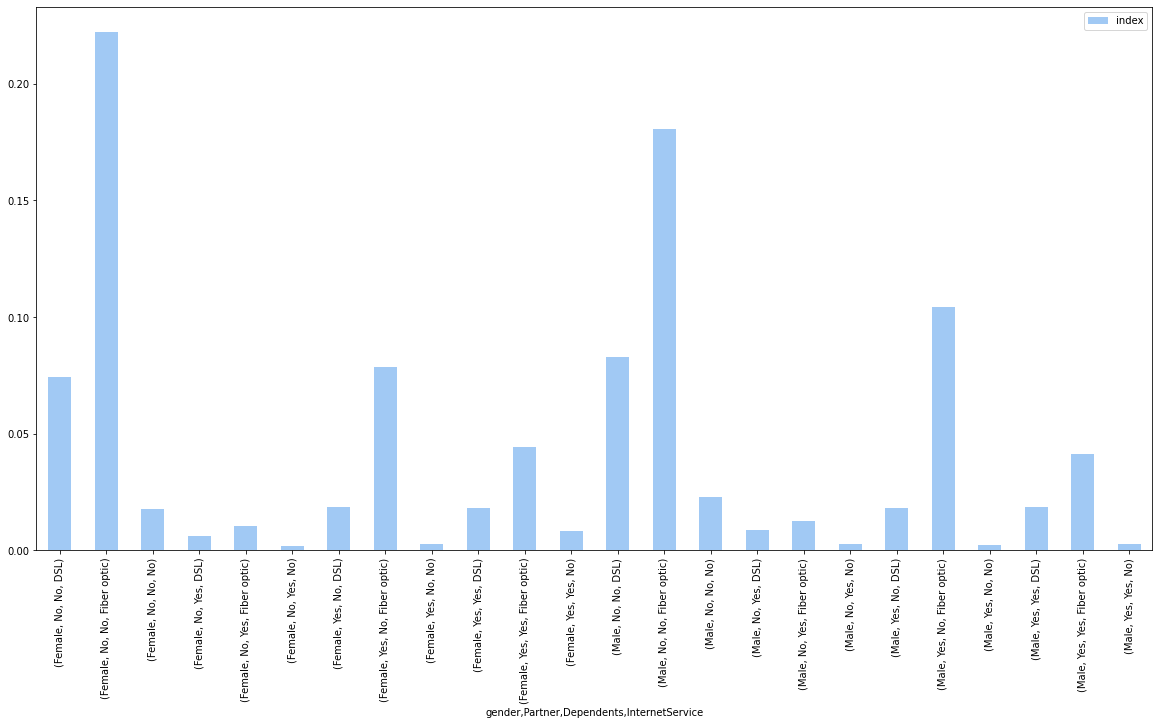

In [ ]:
#Graph visualisation for df2
fig2 =df2.plot(kind='bar', stacked=False,
          colormap=ListedColormap(sns.color_palette("pastel", 2)), 
          figsize=(20,10))

In [ ]:
#Percent of churn customer by gender , dependent, partner and Contract
df3=pd.pivot_table(df[df['Churn']==1], values="index", index=['gender','Partner','Dependents','Contract'], aggfunc="count")
df3=df3/Yes
print("Percent of churn customer by gender , Dependent ,Partner and Contract")
print(df3)

Percent of churn customer by gender , Dependent ,Partner and Contract
                                             index
gender Partner Dependents Contract                
Female No      No         Month-to-month  0.295345
                          One year        0.013911
                          Two year        0.004815
               Yes        Month-to-month  0.014981
                          One year        0.002140
                          Two year        0.000535
       Yes     No         Month-to-month  0.082932
                          One year        0.013911
                          Two year        0.003210
               Yes        Month-to-month  0.057250
                          One year        0.010166
                          Two year        0.003210
Male   No      No         Month-to-month  0.264848
                          One year        0.018727
                          Two year        0.003210
               Yes        Month-to-month  0.021402
            

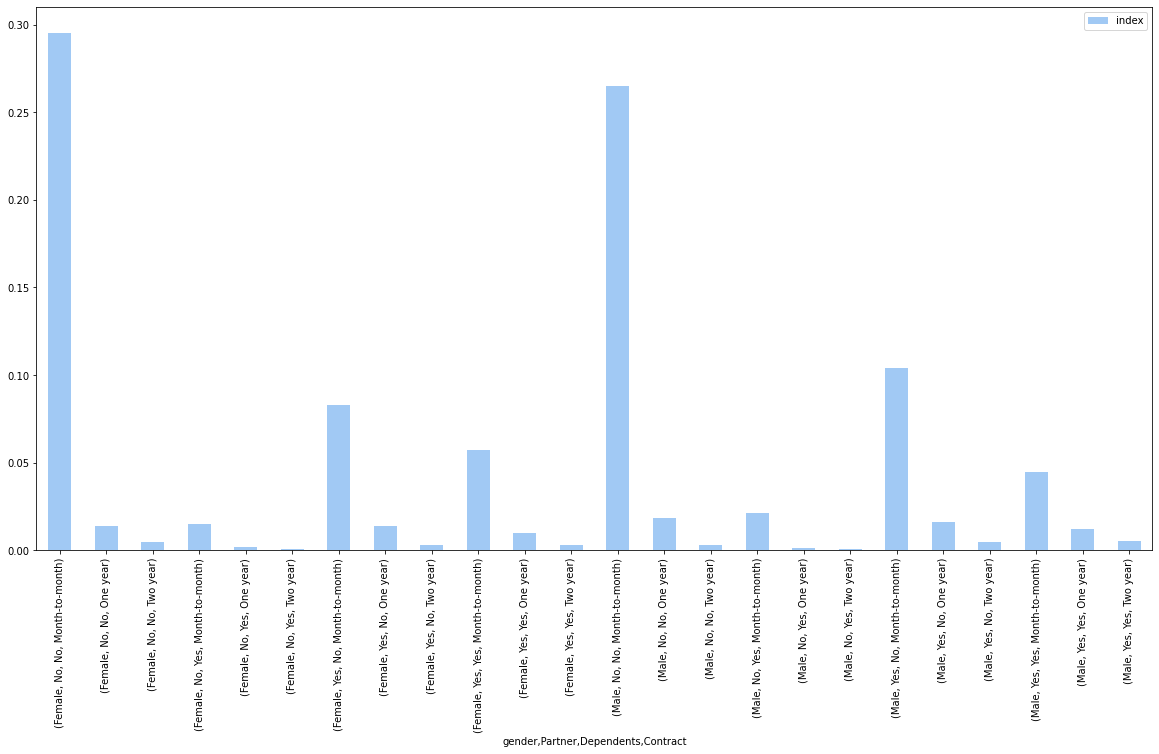

In [ ]:
#Graph visualisation for df3
fig3 =df3.plot(kind='bar', stacked=False,
          colormap=ListedColormap(sns.color_palette("pastel", 2)), 
          figsize=(20,10))

In [ ]:
#Percent of churn customer by gender ,partner, dependent and PaymentMethod
df4=pd.pivot_table(df[df['Churn']==1], values="index", index=['gender','Partner','Dependents', 'PaymentMethod'], aggfunc="count")
df4=df4/Yes
print("Percent of churn customer by gender ,Partner,Dependent and PaymentMethod")
print(df4)


Percent of churn customer by gender ,Partner,Dependent and PaymentMethod
                                                        index
gender Partner Dependents PaymentMethod                      
Female No      No         Bank transfer (automatic)  0.037453
                          Credit card (automatic)    0.041199
                          Electronic check           0.182986
                          Mailed check               0.052434
               Yes        Bank transfer (automatic)  0.003745
                          Credit card (automatic)    0.001605
                          Electronic check           0.006956
                          Mailed check               0.005350
       Yes     No         Bank transfer (automatic)  0.019262
                          Credit card (automatic)    0.016586
                          Electronic check           0.057250
                          Mailed check               0.006956
               Yes        Bank transfer (automatic)  0.0123

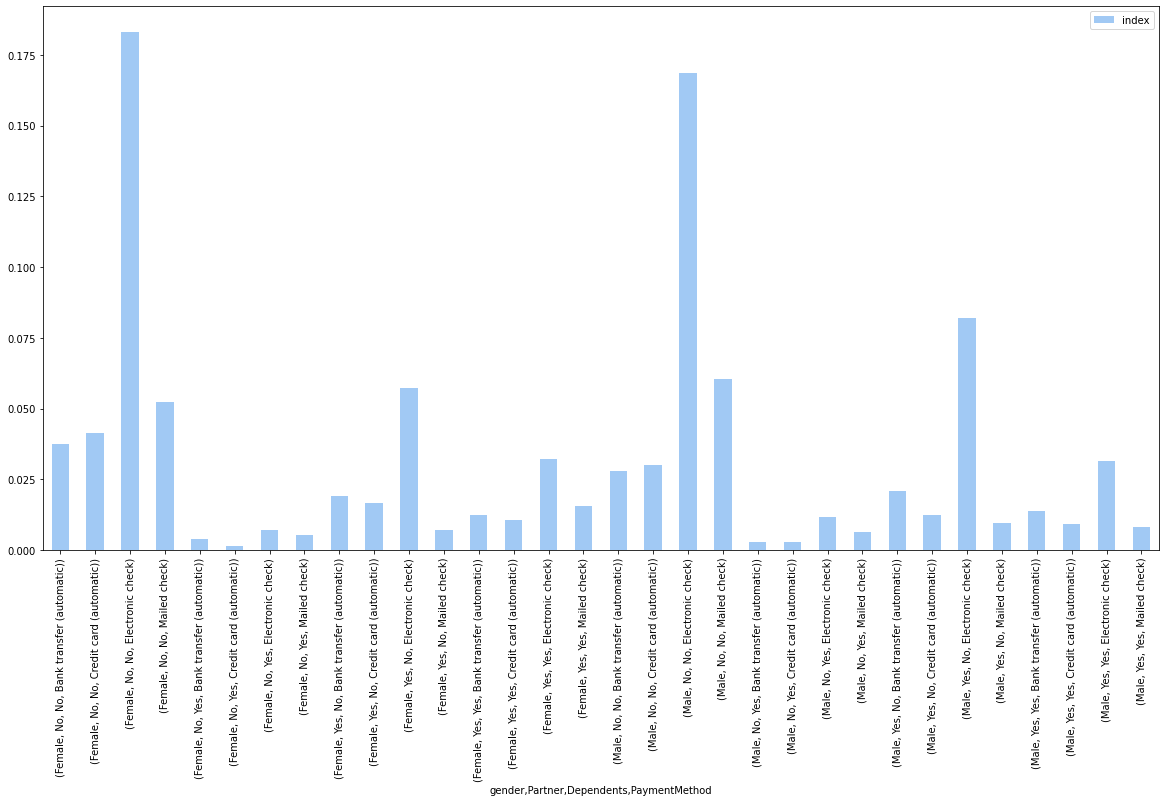

In [ ]:
#Graph visualisation for df4
fig4 =df4.plot(kind='bar', stacked=False,
          colormap=ListedColormap(sns.color_palette("pastel", 2)), 
          figsize=(20,10))

### Analysis :
Based on the new grouping we have just done, we can notice several new categories among the customers who churn.

 Among them are: 

1-Women, who have no partner or dependent person who use the fiber optic. (Rate of resiliation: 22.20%).

2-Men who have no partner or dependent and use fiber optics.(Termination rate: 18%).

3-Men with a partner but no dependents using fiber optics.(Termination rate: 10.43%).

4-Women who have no partner or dependent and who have signed a month to month contract (Termination rate: 29.53%).

5-Men who have no partner or dependent and who have taken out a month to month contract (churn rate: 26.48%).

6-Men who have no partner but dependents and who have taken out a contract month by month (Rate: 21.41%). 

7-Men with a partner but no dependent who have taken out a contract month by month (Rate: 10%). 

8-Women who do not have a partner or dependent and who pay by Electronic check (Rate:18.29%).

9-Men who have no partner or dependent and pay by electronic check (Rate: 16.85%).



###Study Cases Profile
Given the common characteristics and the relatively high rate of the previous categories 4 and 5, we decided to merge them and to consider as study cases ***female or male clients who have no partner or dependent and who have signed a month-to-month contract***.

We will try to see the impact of a 10% decrease in the contract cancellation rate.

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,index
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,2
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,7038
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,7039
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,7040
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,7041


#### Create Pivot Table filt by partner,dependent, contract and total charges

In [ ]:
#Value of churn customer by partner, dependent contract and Total Charges
df5=pd.pivot_table(df[df['Churn']==1], values="index", index=['Partner','Dependents', "Contract", 'TotalCharges'], aggfunc="sum")
print("Value of churn customer by Partner,Dependent, contract and TotalCharges")
print(df5)

Value of churn customer by Partner,Dependent, contract and TotalCharges
                                                index
Partner Dependents Contract       TotalCharges       
No      No         Month-to-month 18.85          6489
                                  19.10          4348
                                  19.30          7681
                                  19.40          2526
                                  19.45          3103
...                                               ...
Yes     Yes        Two year       7156.20        3694
                                  7372.65        3111
                                  7723.70        6398
                                  7723.90        6038
                                  7856.00        5581

[1788 rows x 1 columns]


In [ ]:
#Filt by index level 1 = No
Filter1  =df5[np.in1d(df5.index.get_level_values(0), ['No'])]
Filter1

index
Partner Dependents Contract       TotalCharges       
No      No         Month-to-month 18.85          6489
                                  19.10          4348
                                  19.30          7681
                                  19.40          2526
                                  19.45          3103
...                                               ...
        Yes        One year       4822.85        3534
                                  5069.65        6526
                                  6413.65         855
                   Two year       1052.35        4819
                                  4627.85        6680

[1123 rows x 1 columns]

In [ ]:
#filt by index level 2 = No
f2=Filter1[Filter1.index.isin(['No'], level=1)]
f2

index
Partner Dependents Contract       TotalCharges       
No      No         Month-to-month 18.85          6489
                                  19.10          4348
                                  19.30          7681
                                  19.40          2526
                                  19.45          3103
...                                               ...
                   Two year       6876.05        6785
                                  7250.15         811
                                  7348.80        6408
                                  7532.15         975
                                  7752.30        6289

[1046 rows x 1 columns]

In [ ]:
#Filt by index level 3 = Month-to-month
f3=f2[f2.index.isin(['Month-to-month'], level=2)]
f3

index
Partner Dependents Contract       TotalCharges       
No      No         Month-to-month 18.85          6489
                                  19.10          4348
                                  19.30          7681
                                  19.40          2526
                                  19.45          3103
...                                               ...
                                  6014.85        6853
                                  6396.45         445
                                  6710.50        1575
                                  6886.25        7034
                                  6941.20        2277

[970 rows x 1 columns]

In [ ]:
#Calculate Total losses for the previous profil on the case study
TotalLosses=f3["index"].sum()
TotalLosses

3678324

In [ ]:
Total=df["TotalCharges"].sum()
Total

16056624.3

In [ ]:
#For the profile we decided to study, what is its financial impact on the company?
LossesPercent=(TotalLosses/Total)*100
print(LossesPercent,  '%')

22.908451560394298 %


In [ ]:
#Create a new dataframe report to the financial value of our choosed profil.
financial_report1 = [['TotalLosses', TotalLosses], ['TotalRevenue', Total]]
df2 = pd.DataFrame(financial_report1, columns = ['Columns Title', 'financial_values'])
df2

,Columns Title,financial_values
0,TotalLosses,3678324.0
1,TotalRevenue,16056624.3


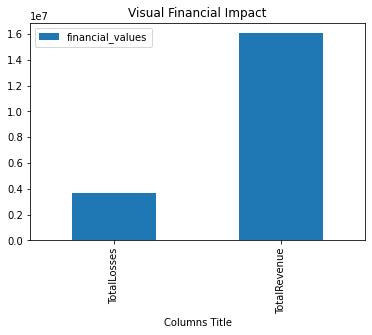

In [ ]:
# a simple line plot
df2.plot(kind='bar',title="Visual Financial Impact",x='Columns Title',y='financial_values')

#### Analysis: 
The profile we decided to study:
People who have no partner or dependent and who sign a month-to-month contract will cause up to 26% loss of income next month or about $3,673,324.

What will be the impact if we decide to implement a policy to reduce the number of people leaving this category by 10%?


In [ ]:
Gain=TotalLosses*0.1
Gain

367832.4

In [ ]:
#Losses Projection if they arrive to retain 10% of selected profile
TotalLosses2=TotalLosses-(TotalLosses*0.1)
print(TotalLosses2, "$")

3310491.6 $


In [ ]:
#Build dataFrame
financial_impact = [['TotalLosses', TotalLosses],['TotalLosses2',TotalLosses2],['Gain', Gain]]
df3 = pd.DataFrame(financial_impact, columns = ['Columns Title', 'financial_values'])
df3

,Columns Title,financial_values
0,TotalLosses,3678324.0
1,TotalLosses2,3310491.6
2,Gain,367832.4


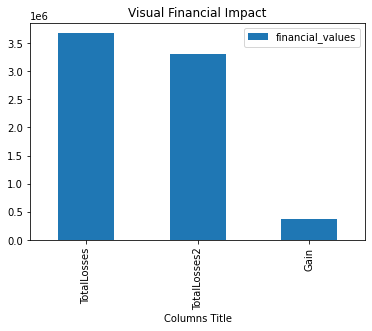

In [ ]:
#Visualisation of impact
df3.plot(kind='bar',title="Visual Financial Impact",x='Columns Title',y='financial_values')

#####Analysis: 
Based on the average sales of this category: a 10% decrease in the number of churns will allow Telco to earn approximatively 367 832$ for the next month.

# Question 4:

Use a clustering algorithm like K-Means to break customers into groups.

a.How many groups did you build and how did you decide on that number of groups?

b.How does churn vary by group?

c.How is this similar or different to your analysis without using Machine Learning?

In [ ]:
new_features = ['OnlineSecurity_No',"TechSupport_No","InternetService_Fiber optic","PaymentMethod_Electronic check","OnlineBackup_No","DeviceProtection_No","PaperlessBilling_Yes","Dependents_No","SeniorCitizen_1","Partner_No","StreamingMovies_No","StreamingTV_No"]
x1=df_dummies[new_features]
x1

,OnlineSecurity_No,TechSupport_No,InternetService_Fiber optic,PaymentMethod_Electronic check,OnlineBackup_No,DeviceProtection_No,PaperlessBilling_Yes,Dependents_No,SeniorCitizen_1,Partner_No,StreamingMovies_No,StreamingTV_No
0,1,1,0,1,0,1,1,1,0,0,1,1
1,0,1,0,0,1,0,0,1,0,1,1,1
2,0,1,0,0,0,1,1,1,0,1,1,1
3,0,0,0,0,1,0,0,1,0,1,1,1
4,1,1,1,1,1,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,1,0,1,0,0,0,0,0
7039,1,1,1,0,0,0,1,0,0,0,0,0
7040,0,1,0,1,1,1,1,0,0,0,1,1
7041,1,1,1,0,1,1,1,1,1,0,1,1


In [ ]:
#Split Data to enter the Machine Learning model 
X= df_dummies.drop(columns=["tenure",	"MonthlyCharges",	"TotalCharges","Churn"])
y = df_dummies["Churn"].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=101)

In [ ]:
X

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
2,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0
4,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
7039,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0
7040,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
7041,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
#Machine Learning Model
models = [('LR', LogisticRegression(solver='liblinear')),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('SVC', SVC(gamma='auto')),
          ('GB',GradientBoostingClassifier()),
          ("LightGBM", LGBMClassifier())]

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.779355 (0.008669)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.738461 (0.008288)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.713903 (0.013090)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.745275 (0.012078)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVC: 0.778361 (0.012039)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GB: 0.774103 (0.011560)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LightGBM: 0.770553 (0.011263)


In [ ]:
models ={
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42),
    'RandomForestClassifier' : RandomForestClassifier(),
    'SVC' : SVC(gamma='auto'),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    "LightGBM" : LGBMClassifier()
}
# Precision Function
def accu(y_true,y_pred,retu=False):
  acc=accuracy_score(y_true,y_pred)
  if retu:
    return acc
  else:
    print(f'The precision of this model is:  {acc}')
    
# Application Model Function
def train_test_eval(models,X_train,y_train,X_test,y_test):
  for name,model in models.items():
    print(name,':')
    model.fit(X_train,y_train)
    accu(y_test,model.predict(X_test))
    print('-'*30)
train_test_eval(models,X_train,y_train,X_test,y_test)

LogisticRegression :
The precision of this model is:  0.7750177430801988
------------------------------
KNeighborsClassifier :
The precision of this model is:  0.7338537970191625
------------------------------
DecisionTreeClassifier :
The precision of this model is:  0.7281760113555713
------------------------------
RandomForestClassifier :
The precision of this model is:  0.7452093683463449
------------------------------
SVC :
The precision of this model is:  0.7700496806245565
------------------------------
GradientBoostingClassifier :
The precision of this model is:  0.7700496806245565
------------------------------
LightGBM :
The precision of this model is:  0.7608232789212207
------------------------------


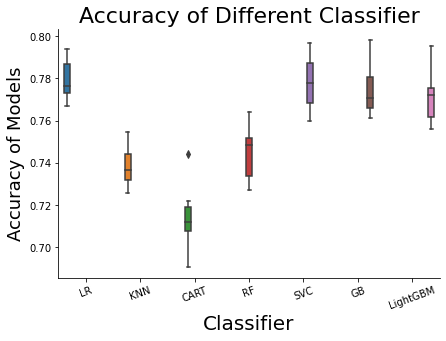

In [ ]:
# boxplot algorithm comparison
dict={}
for i,j in zip(names, results):
    dict[i]=j
    
df = pd.DataFrame(dict)
df = pd.melt(df)
g = sns.catplot(data = df, x="variable", y="value", kind="box", hue = "variable", height=4, aspect=1.5)
plt.title('Accuracy of Different Classifier', fontsize=22)
plt.xlabel("Classifier", fontsize=20)
plt.ylabel("Accuracy of Models", fontsize=18)
g.set_xticklabels(rotation=20, fontsize=10)
plt.show()

In [ ]:
import time 
times_list = []
scores = []
maes = []
mses = []
msles = []
rmses = []
model_names = ['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','SVC','GradientBoostingClassifier',"LightGBM"]
models =[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GradientBoostingClassifier(),LGBMClassifier()]

#Show Model Details 
for model in models:
  start = time.time()
  model.fit(X_train,y_train)
  end = time.time()
  times_list.append(end-start)
  scores.append( model.score(X_test,y_test))
  y_pred = model.predict(X_test)
  maes.append(mean_absolute_error(y_test,y_pred)) 
  values = mean_squared_error(y_test,y_pred)
  mses.append(values)
  rmses.append(np.sqrt(values))

#Print descriptive Table
#df6=pd.DataFrame(dict1=[names=model_names,scores=scores,mses=mses,maes=maes,times=times_list,rmses=rmses])

In [ ]:
#dic =[]
#df6 = pd.DataFrame(dic[model_names,scores,mses,maes,times_list,rmses])

In [ ]:
report = [['names',model_names],['scores',scores],['mses',mses],['maes',maes],['times',times_list],['rmses',rmses]]
#df6 = pd.DataFrame(report, columns = ['names','scores','mses','maes','times','rmses'])
#df6
report

[['names',
  ['LogisticRegression',
   'KNeighborsClassifier',
   'DecisionTreeClassifier',
   'RandomForestClassifier',
   'SVC',
   'GradientBoostingClassifier',
   'LightGBM']],
 ['scores',
  [0.7750177430801988,
   0.7338537970191625,
   0.7146912704045423,
   0.7430801987224982,
   0.7743080198722498,
   0.7700496806245565,
   0.7608232789212207]],
 ['mses',
  [0.22498225691980128,
   0.26614620298083747,
   0.2853087295954578,
   0.25691980127750175,
   0.22569198012775019,
   0.22995031937544358,
   0.23917672107877927]],
 ['maes',
  [0.22498225691980128,
   0.26614620298083747,
   0.2853087295954578,
   0.25691980127750175,
   0.22569198012775019,
   0.22995031937544358,
   0.23917672107877927]],
 ['times',
  [0.058409929275512695,
   0.0593266487121582,
   0.021263837814331055,
   0.58492112159729,
   1.868553876876831,
   0.7629289627075195,
   0.13007283210754395]],
 ['rmses',
  [0.47432294580781276,
   0.5158935965689412,
   0.5341429860959122,
   0.5068725690718543,
   0.4

### Analysis :
This Boxplot show us the Accuracy Of different Classifier Model.
------------------------------
-Logistic Regression Model have a accuracy of 77.50% .
------------------------------
-KNeighborsClassifier Model have a accuracy of 73.38%.
------------------------------
-DecisionTreeClassifier (CART) Model have a accuracy of 72.81%.
------------------------------
-RandomForestClassifier Model have a precision of 74.09 %.
------------------------------
-SVC have a precision of 77%.
------------------------------
-GradientBoostingClassifier have 77% for accuracy.
------------------------------
-LightGBM have a precision of 76.08%.
------------------------------

### Build A K-Means Model

In [ ]:
""""
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = KMeans(n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show() """"

SyntaxError: ignored

In [ ]:
#Normalize X
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#We want to cluster the customer in 2 group .Customer Churn and Customer non-Churn.
#kmeans= KMeans(n_clusters=2, max_iter=1000, algorithm="auto",random_state=1)
#kmeans.fit(X_scaled)

In [ ]:
X_scaled

array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [ ]:
X1 = pd.DataFrame(data=X_scaled,columns=list(X.columns))
#X1['Churn'] = df ['Churn']
X1

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
7039,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
7040,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7041,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.569


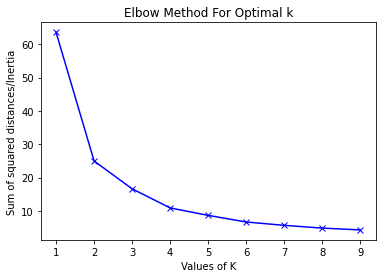

In [ ]:
#Elbow Method Visualisation
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X_scaled)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

ValueError: ignored

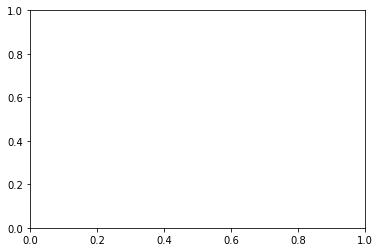

In [ ]:
#Silhouette Analysis K-Means technique Visualisation
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
# initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X_scaled)
 cluster_labels = kmeans.labels_
 
# silhouette score
 silhouette_avg.append((silhouette_score(X_scaled, cluster_labels)),plt.plot(range_n_clusters,silhouette_avg,'bx-'))
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [ ]:
#correct = 0

#prediction = kmeans.predict(X)

#pred_df = pd.DataFrame({"actual": y, "prediction": prediction})
#print(pred_df)